Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Checking null **values**

In [ ]:
diabetes_dataset.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Checking Duplicate Values

In [ ]:
diabetes_dataset.duplicated().sum()

0

Data Visualization

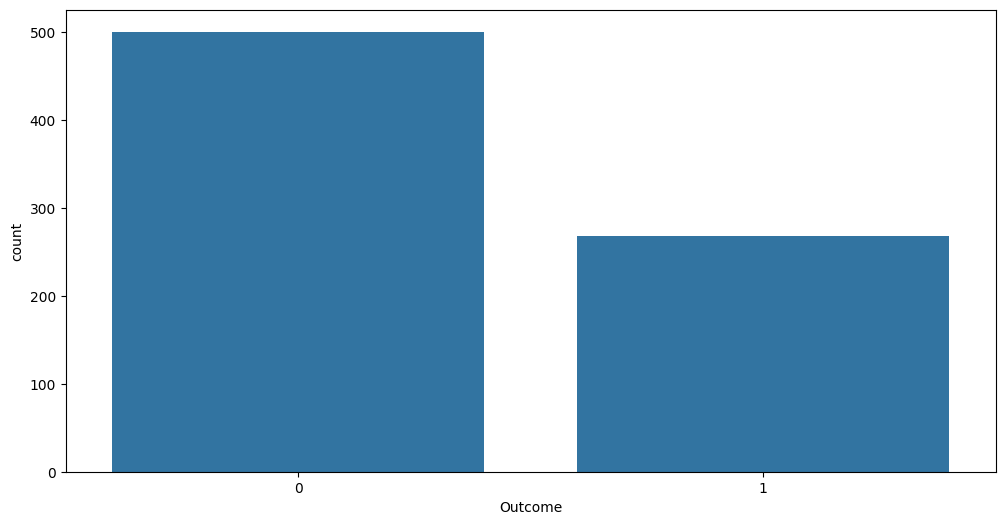

In [ ]:
plt.figure(figsize= (12,6))
sns.countplot(x = 'Outcome', data= diabetes_dataset)
plt.show()

Observing Outliers

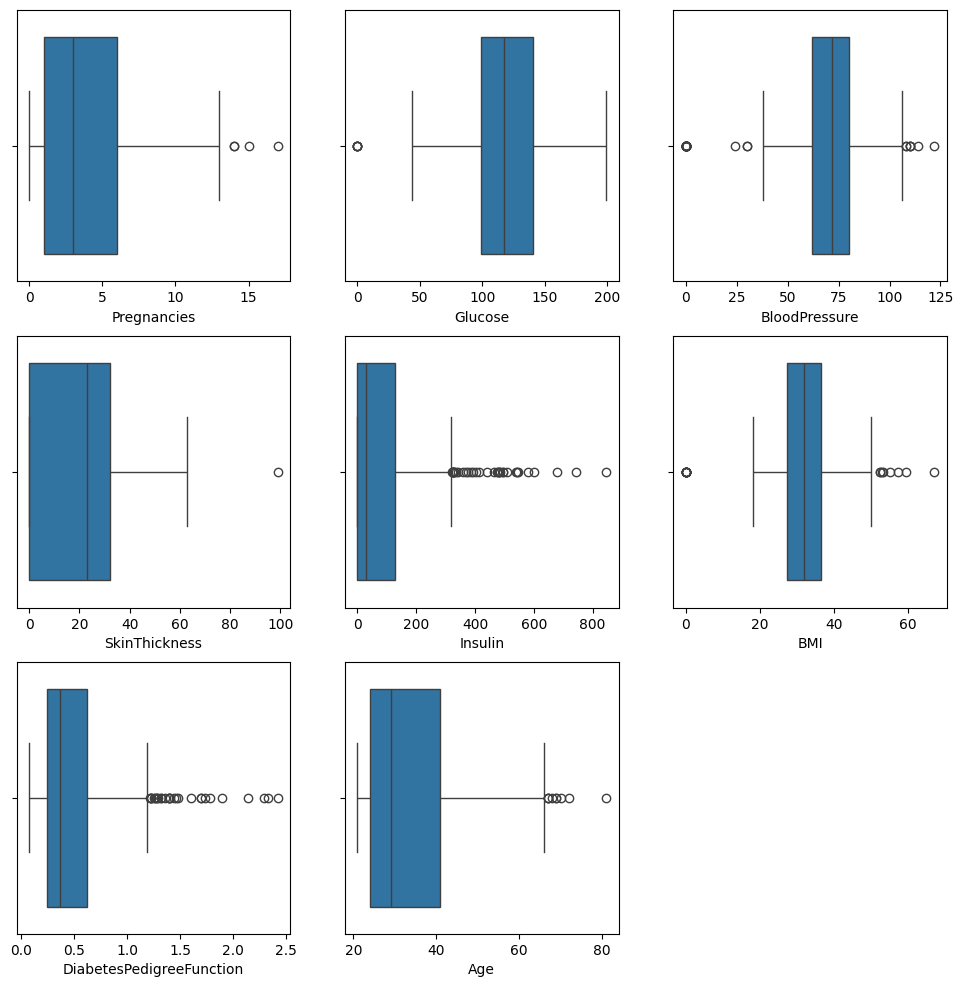

In [ ]:
plt.figure(figsize=(12,12))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
  plt.subplot(3,3, i+1)
  sns.boxplot(x = col, data = diabetes_dataset)
plt.show()

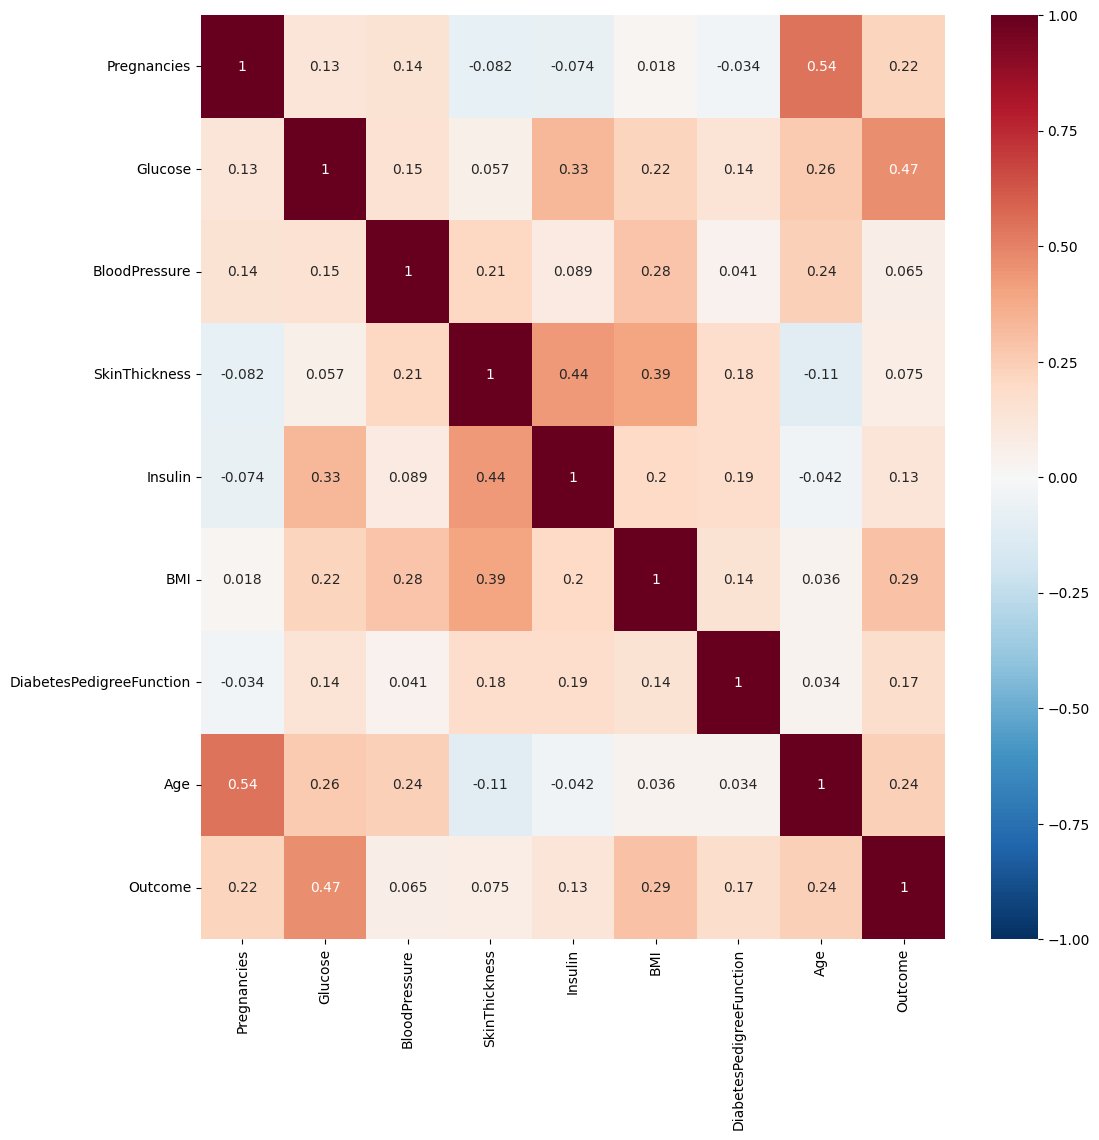

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(diabetes_dataset.corr(), vmin=-1.0, center=0, cmap='RdBu_r', annot=True)
plt.show()

In [ ]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (537, 8) (231, 8)


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize the models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
svc = SVC(kernel='linear')

# Train the models
logistic_regression.fit(X_train, Y_train)
random_forest.fit(X_train, Y_train)
svc.fit(X_train, Y_train)


SVC(kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score

# Predictions on training data
log_reg_train_prediction = logistic_regression.predict(X_train)
rf_train_prediction = random_forest.predict(X_train)
svc_train_prediction = svc.predict(X_train)

# Accuracy score on training data
log_reg_training_accuracy = accuracy_score(log_reg_train_prediction, Y_train)
rf_training_accuracy = accuracy_score(rf_train_prediction, Y_train)
svc_training_accuracy = accuracy_score(svc_train_prediction, Y_train)

print(f"Logistic Regression Training Accuracy: {log_reg_training_accuracy}")
print(f"Random Forest Training Accuracy: {rf_training_accuracy}")
print(f"Support Vector Classifier Training Accuracy: {svc_training_accuracy}")


Logistic Regression Training Accuracy: 0.7802607076350093
Random Forest Training Accuracy: 1.0
Support Vector Classifier Training Accuracy: 0.7821229050279329


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predictions on test data
log_reg_test_prediction = logistic_regression.predict(X_test)
rf_test_prediction = random_forest.predict(X_test)
svc_test_prediction = svc.predict(X_test)

# Accuracy score on test data
log_reg_test_accuracy = accuracy_score(Y_test, log_reg_test_prediction)
rf_test_accuracy = accuracy_score(Y_test, rf_test_prediction)
svc_test_accuracy = accuracy_score(Y_test, svc_test_prediction)

# Confusion Matrix
log_reg_test_confusion_matrix = confusion_matrix(Y_test, log_reg_test_prediction)
rf_test_confusion_matrix = confusion_matrix(Y_test, rf_test_prediction)
svc_test_confusion_matrix = confusion_matrix(Y_test, svc_test_prediction)

# Print results
print("Logistic Regression Test Metrics:")
print(f"Accuracy: {log_reg_test_accuracy}")
print(f"Confusion Matrix:\n{log_reg_test_confusion_matrix}")

print("\nRandom Forest Test Metrics:")
print(f"Accuracy: {rf_test_accuracy}")
print(f"Confusion Matrix:\n{rf_test_confusion_matrix}")

print("\nSVC Test Metrics:")
print(f"Accuracy: {svc_test_accuracy}")
print(f"Confusion Matrix:\n {svc_test_confusion_matrix}")

Logistic Regression Test Metrics:
Accuracy: 0.7792207792207793
Confusion Matrix:
[[139  11]
 [ 40  41]]

Random Forest Test Metrics:
Accuracy: 0.7575757575757576
Confusion Matrix:
[[129  21]
 [ 35  46]]

SVC Test Metrics:
Accuracy: 0.7748917748917749
Confusion Matrix:
 [[139  11]
 [ 41  40]]


In [ ]:
# input_data = (5,166,72,19,175,25.8,0.587,51)
input_data = (0, 120, 50, 20, 160, 20, 0.2, 20)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
# Logistic Regression Prediction
log_reg_prediction = logistic_regression.predict(std_data)
print("Logistic Regression Prediction:", log_reg_prediction)

if log_reg_prediction[0] == 0:
    print('The person is not diabetic (Logistic Regression)')
else:
    print('The person is diabetic (Logistic Regression)')

# Random Forest Prediction
rf_prediction = random_forest.predict(std_data)
print("Random Forest Prediction:", rf_prediction)

if rf_prediction[0] == 0:
    print('The person is not diabetic (Random Forest)')
else:
    print('The person is diabetic (Random Forest)')

svc_prediction = svc.predict(std_data)
print("SVM Prediction", svc_prediction)

Logistic Regression Prediction: [0]
The person is not diabetic (Logistic Regression)
Random Forest Prediction: [0]
The person is not diabetic (Random Forest)
SVM Prediction [0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# input_data =  [5.0, 47.0, 120.0, 1.0, 12.0, 12.0, 12.0, 12.0]
input_data = [1.0, 89.0, 66.0, 23.0, 94.0, 28.0, 0.16, 21.0]

# Reshape input_data to be a 2D array
input_data_reshaped = np.array(input_data).reshape(1, -1)

# Logistic Regression Prediction
log_reg_prediction = logistic_regression.predict(input_data_reshaped)
print("Logistic Regression Prediction:", log_reg_prediction)

if log_reg_prediction[0] == 0:
    print('The person is not diabetic (Logistic Regression)')
else:
    print('The person is diabetic (Logistic Regression)')

# Random Forest Prediction
rf_prediction = random_forest.predict(input_data_reshaped)
print("Random Forest Prediction:", rf_prediction)

if rf_prediction[0] == 0:
    print('The person is not diabetic (Random Forest)')
else:
    print('The person is diabetic (Random Forest)')

svc_prediction = svc.predict(input_data_reshaped)
print("SVC prediction:", svc_prediction)

Logistic Regression Prediction: [1]
The person is diabetic (Logistic Regression)
Random Forest Prediction: [1]
The person is diabetic (Random Forest)
SVC prediction: [1]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import joblib

# Load your data (assumed to be raw data)
diabetes_dataset = pd.read_csv('diabetes.csv')
X = diabetes_dataset.drop(columns='Outcome')
Y = diabetes_dataset['Outcome']

# Split raw data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

# Build a pipeline that scales raw data and then applies SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear', C=1.0))  # You can tune parameters as needed
])

pipeline.fit(X_train, Y_train)

# Save the pipeline
joblib.dump(pipeline, 'diabetes_pipeline.joblib')
print("Pipeline retrained on raw data and saved.")


Pipeline retrained on raw data and saved.
